In [39]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
import json

# Define the number of qubits
num_qubits = 5

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(num_qubits, num_qubits)



for i in range (num_qubits-1):
    circuit.h(i)
    
circuit.barrier()
circuit.cx(1,4)
circuit.cx(2,4)
circuit.barrier()

for i in range(num_qubits-2):
    circuit.h(i)

# Add measurement to the circuit
circuit.measure([0,1,2,3],[0,1,2,3])

# Create a noise model
noise_model = NoiseModel()

# Add depolarizing error to all single-qubit u1, u2, u3 gates
error_1 = depolarizing_error(0.01, 1)
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])

# Add amplitude damping error to all single-qubit gates
error_2 = amplitude_damping_error(0.05)
noise_model.add_all_qubit_quantum_error(error_2, ['u1', 'u2', 'u3'])

# Add the same amplitude damping error to measurement
noise_model.add_all_qubit_quantum_error(error_2, "measure")

# Perform a noise simulation
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit with the noise model 500 times and collect the results
all_counts = []
for _ in range(500):
    result = execute(circuit, simulator, noise_model=noise_model, shots=1024).result()
    counts = result.get_counts(circuit)
    all_counts.append(counts)

# Save the results to a JSON file for further analysis
with open('simulation_results.json', 'w') as f:
    json.dump(all_counts, f)

print("Simulation completed and results stored in 'simulation_results.json'.")


Simulation completed and results stored in 'simulation_results.json'.


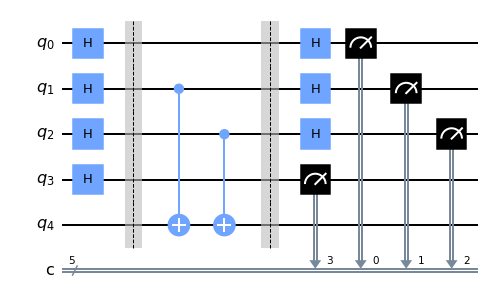

In [44]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Define the number of qubits
num_qubits = 5

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(num_qubits, num_qubits)

for i in range (num_qubits-1):
    circuit.h(i)
    
circuit.barrier()
circuit.cx(1,4)
circuit.cx(2,4)
circuit.barrier()

for i in range(num_qubits-2):
    circuit.h(i)

# Add measurement to the circuit
circuit.measure([0,1,2,3],[0,1,2,3])

# Draw the circuit
circuit.draw(output='mpl')


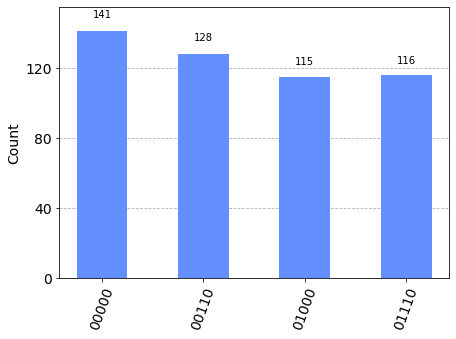

In [59]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
from qiskit import transpile


# Define the backend to use for the simulation
simulator = Aer.get_backend('aer_simulator')

# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the simulation, specifying the number of times to run the circuit
job = simulator.run(compiled_circuit, shots=500)

# Grab the results from the job
result = job.result()

# Get the counts (the number of times each result appeared)
counts = result.get_counts(circuit)

# Display the histogram of counts
plot_histogram(counts)



Total count for 00 and 11 are: {'11': 502, '00': 498}


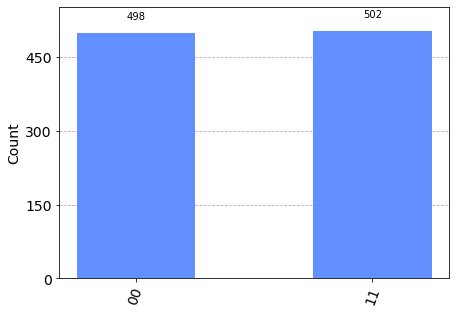

In [41]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw("mpl")

# Plot a histogram
plot_histogram(counts)

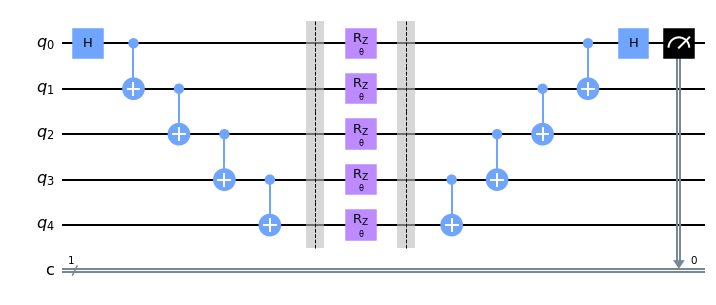

In [45]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')